In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Step 1: Load and preprocess the dataset
data = pd.read_csv("C:/Users/samue/Downloads/data_assessment_2/data_for_sentiment_analyzis/amazon_reviews.csv")

# Drop rows with missing values
data.dropna(subset=['cleaned_review'], inplace=True)

# Balance the distribution of labels
balanced_data = pd.DataFrame()
for sentiment in ['positive', 'neutral', 'negative']:
    subset = data[data['sentiments'] == sentiment]
    balanced_data = balanced_data.append(subset.sample(n=min(17340, len(subset)), random_state=42))

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(balanced_data, test_size=0.3, random_state=42)

# Step 2: Implement sentiment analysis models

# Version 1: Bag-of-Words (BoW) approach
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(train_data['cleaned_review'])
X_test_bow = vectorizer.transform(test_data['cleaned_review'])
y_train = train_data['sentiments']
y_test = test_data['sentiments']

# Version 2: Preprocessing with Lemmatization and BoW approach
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_tokens]
    return ' '.join(lemmatized_tokens)

train_data['lemmatized_review'] = train_data['cleaned_review'].apply(lemmatize_text)
test_data['lemmatized_review'] = test_data['cleaned_review'].apply(lemmatize_text)

X_train_lem = vectorizer.fit_transform(train_data['lemmatized_review'])
X_test_lem = vectorizer.transform(test_data['lemmatized_review'])


C:\Users\samue\AppData\Local\Temp\ipykernel_23476\3685968769.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(subset.sample(n=min(17340, len(subset)), random_state=42))
C:\Users\samue\AppData\Local\Temp\ipykernel_23476\3685968769.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(subset.sample(n=min(17340, len(subset)), random_state=42))
C:\Users\samue\AppData\Local\Temp\ipykernel_23476\3685968769.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(subset.sample(n=min(17340, len(subset)), random_state=42))
C:\Users\samue\AppData\Local\Temp\ipykernel_23476\3685968769.py:58: SettingWithCopyWarning: 
A value is

Bag-of-Words (BoW) Approach:
Accuracy: 0.8721645520953479
              precision    recall  f1-score   support

    negative       0.66      0.69      0.67       452
     neutral       0.83      0.86      0.85      1906
    positive       0.94      0.91      0.92      2844

    accuracy                           0.87      5202
   macro avg       0.81      0.82      0.81      5202
weighted avg       0.88      0.87      0.87      5202



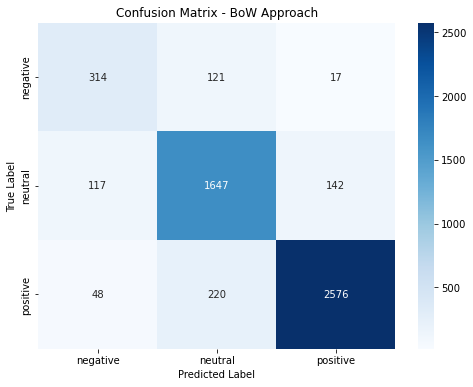

Lemmatization and Bag-of-Words (BoW) Approach:
Accuracy: 0.8694732795078816
              precision    recall  f1-score   support

    negative       0.65      0.69      0.67       452
     neutral       0.83      0.85      0.84      1906
    positive       0.94      0.91      0.92      2844

    accuracy                           0.87      5202
   macro avg       0.80      0.82      0.81      5202
weighted avg       0.87      0.87      0.87      5202



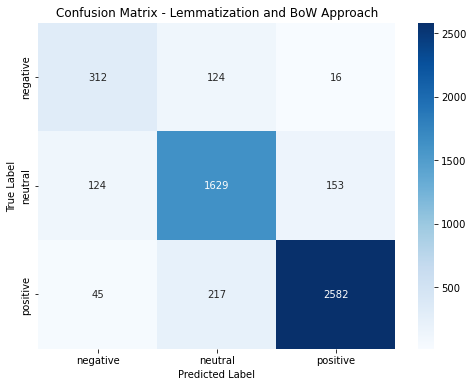

In [7]:
# Step 3: Train and evaluate the models

# Version 1: Bag-of-Words (BoW) approach
classifier_bow = SVC(kernel='linear') 
classifier_bow.fit(X_train_bow, y_train)
y_pred_bow = classifier_bow.predict(X_test_bow)

# Version 2: Preprocessing with Lemmatization and BoW approach
classifier_lem = SVC(kernel='linear') 
classifier_lem.fit(X_train_lem, y_train)
y_pred_lem = classifier_lem.predict(X_test_lem)

# Step 4: Compare the performance

# Version 1: Bag-of-Words (BoW) approach
print("Bag-of-Words (BoW) Approach:")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

# Confusion matrix for BoW approach
cm_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - BoW Approach')
plt.show()

# Version 2: Preprocessing with Lemmatization and BoW approach
print("Lemmatization and Bag-of-Words (BoW) Approach:")
print("Accuracy:", accuracy_score(y_test, y_pred_lem))
print(classification_report(y_test, y_pred_lem))

# Confusion matrix for Lemmatization and BoW approach
cm_lem = confusion_matrix(y_test, y_pred_lem)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lem, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Lemmatization and BoW Approach')
plt.show()
